<a href="https://colab.research.google.com/github/Joovvhan/Master-Thesis/blob/master/src/(FAN)%20Transfer_Learning.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import necessary modules

import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wf
import time
import glob
import datetime

from tqdm import trange

# Import Keras modules

from keras.preprocessing import image
from keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.models import Sequential
from keras import backend as K
from keras.models import load_model


Using TensorFlow backend.


In [0]:
# Set data directories

dataPath = 'gdrive/My Drive/Colab/Data'
dataPath = '''D:\\0_Joowhan's Paper\\Real Data\\Split Data'''

folderNormal = ['1Mass']

folderFault = ['5Mass']

pathNormal = list()
pathFault = list()

for i in range(len(folderNormal)):
    pathNormal.append(dataPath + '/' + folderNormal[i])
    
for i in range(len(folderFault)):
    pathFault.append(dataPath + '/' + folderFault[i])

In [0]:
# Specgram settings

imgSize = 224

# pretrainedModel = 'VGG19'
# pretrainedModel = 'ResNet50'

# pretrainedModel = 'VGG16'
# pretrainedModel = 'VGG19'
pretrainedModel = 'Xception'

lastActivation = 'softmax'
sizeBatch = 4
numEpochs = 4
verb = 1


# Learning parameters

trainingRatio = 0.8

In [7]:
startNum = 0

pickNum = int(np.ceil(totalDataNum / len(pathNormal)))

for i in range(startNum, len(pathNormal)):

    npyTestPath = glob.glob(pathNormal[i] + '/' + '*Image_With_Label*.npy')
    
    randomPick = np.random.choice(len(npyTestPath), 5, replace=False)
    randomPick.sort()
    
    check = 0
    
    for j in randomPick:
        data = np.load(npyTestPath[0])

    #     imgs = np.moveaxis(np.dstack(data[:, 0]), 2, 0)
    #     label = data[:, 1:5]

        imgs = np.moveaxis(np.dstack(data[:, 0]), 2, 0)
        label = data[:, 1]

        if check == 0:
            labelListNormal = label
            imgsNormal = imgs
            check = 1
        else:
            labelListNormal = np.vstack([labelListNormal, label])
            imgsNormal = np.vstack([imgsNormal, imgs])

        print('Normal Image Shape From {}: {}:'.format(pathNormal[i], imgsNormal.shape))    
        print('Selected {}/{}:'.format(pickNum * (i + 1), len(data)))    
    
    
    print('Normal Image Shape: {}'.format(imgsNormal.shape))


Normal Image Shape From D:\0_Joowhan's Paper\Real Data\Split Data/1Mass: (240, 224, 224):
Selected 1000/240:
Normal Image Shape From D:\0_Joowhan's Paper\Real Data\Split Data/1Mass: (480, 224, 224):
Selected 1000/240:
Normal Image Shape From D:\0_Joowhan's Paper\Real Data\Split Data/1Mass: (720, 224, 224):
Selected 1000/240:
Normal Image Shape From D:\0_Joowhan's Paper\Real Data\Split Data/1Mass: (960, 224, 224):
Selected 1000/240:
Normal Image Shape From D:\0_Joowhan's Paper\Real Data\Split Data/1Mass: (1200, 224, 224):
Selected 1000/240:
Normal Image Shape: (1200, 224, 224)


In [8]:
for i in range(startNum, len(pathFault)):

    npyTestPath = glob.glob(pathFault[i] + '/' + '*Image_With_Label*.npy')
    data = np.load(npyTestPath[0])
    
    
    randomPick = np.random.choice(len(npyTestPath), 5, replace=False)
    randomPick.sort()
    
    check = 0
    
    for j in randomPick:
        data = np.load(npyTestPath[0])

    #     imgs = np.moveaxis(np.dstack(data[:, 0]), 2, 0)
    #     label = data[:, 1:5]

        imgs = np.moveaxis(np.dstack(data[:, 0]), 2, 0)
        label = data[:, 1]

        if check == 0:
            labelListFault = label
            imgsFault = imgs
            check = 1
        else:
            labelListFault = np.vstack([labelListFault, label])
            imgsFault = np.vstack([imgsFault, imgs])

        print('Fault Image Shape From {}: {}:'.format(pathFault[i], imgsFault.shape))    
    print('Fault Image Shape: {}'.format(imgsFault.shape))


Fault Image Shape From D:\0_Joowhan's Paper\Real Data\Split Data/5Mass: (240, 224, 224):
Fault Image Shape From D:\0_Joowhan's Paper\Real Data\Split Data/5Mass: (480, 224, 224):
Fault Image Shape From D:\0_Joowhan's Paper\Real Data\Split Data/5Mass: (720, 224, 224):
Fault Image Shape From D:\0_Joowhan's Paper\Real Data\Split Data/5Mass: (960, 224, 224):
Fault Image Shape From D:\0_Joowhan's Paper\Real Data\Split Data/5Mass: (1200, 224, 224):
Fault Image Shape: (1200, 224, 224)


In [9]:
# Change name from imgsF1 or imgsF5 to imgsNormal and imgsFault

dataNumNormal = len(imgsNormal)
dataNumFault = len(imgsFault)
dataNumNormalTrain = int(dataNumNormal * trainingRatio)
dataNumFaultTrain = int(dataNumFault * trainingRatio)
dataNumNormalTest = dataNumNormal - dataNumNormalTrain
dataNumFaultTest = dataNumFault - dataNumFaultTrain

print('Normal Train:Test = {:d}:{:d}'.format(dataNumNormalTrain, dataNumNormalTest))
print('Fault  Train:Test = {:d}:{:d}\n'.format(dataNumFaultTrain, dataNumFaultTest))

trainIdxNormal = np.random.choice(dataNumNormal - 1, dataNumNormalTrain, replace=False)
testIdxNormal = list(set(range(0, dataNumNormal)) - set(trainIdxNormal))

trainImgsNormal = imgsNormal[trainIdxNormal, :, :]
testImgsNormal = imgsNormal[testIdxNormal, :, :]

print('Normal Training Image Shape {}'.format(trainImgsNormal.shape))
print('Normal Test Image Shape {}\n'.format(testImgsNormal.shape))

trainIdxFault  = np.random.choice(dataNumFault - 1, dataNumFaultTrain, replace=False)
testIdxFault = list(set(range(0, dataNumFault)) - set(trainIdxFault))

trainImgsFault = imgsFault[trainIdxFault, :, :]
testImgsFault = imgsFault[testIdxFault, :, :]

print('Fault Training Image Shape {}'.format(trainImgsFault.shape))
print('Fault Test Image Shape {}\n'.format(testImgsFault.shape))

trainImgs = np.vstack([trainImgsNormal, trainImgsFault])
testImgs = np.vstack([testImgsNormal, testImgsFault])

print('Training Image Shape {}'.format(trainImgs.shape))
print('Test Image Shape {}'.format(testImgs.shape))

Normal Train:Test = 960:240
Fault  Train:Test = 960:240

Normal Training Image Shape (960, 224, 224)
Normal Test Image Shape (240, 224, 224)

Fault Training Image Shape (960, 224, 224)
Fault Test Image Shape (240, 224, 224)

Training Image Shape (1920, 224, 224)
Test Image Shape (480, 224, 224)


In [10]:
trainMean = np.mean(trainImgs)
trainStd = np.std(trainImgs)

print('Mean of Training Image: {}'.format(trainMean))
print('Standard Deviation of Training Image: {}'.format(trainStd))

Mean of Training Image: -112.51074481560677
Standard Deviation of Training Image: 17.909690275251805


In [0]:
# Should Change Norm to Normalized

trainImgsNorm = (trainImgs - trainMean) / trainStd
testImgsNorm = (testImgs - trainMean) / trainStd

trainImgsNorm = trainImgsNorm.reshape(list(trainImgsNorm.shape) + [1])
testImgsNorm = testImgsNorm.reshape(list(testImgsNorm.shape) + [1])

In [12]:
X_train = np.stack([trainImgsNorm[:, :, :, 0], trainImgsNorm[:, :, :, 0], trainImgsNorm[:, :, :, 0]], axis = -1)
X_test = np.stack([testImgsNorm[:, :, :, 0], testImgsNorm[:, :, :, 0], testImgsNorm[:, :, :, 0]], axis = -1)

print('X_train Shape: {}'.format(X_train.shape))
print('X_test  Shape: {}'.format(X_test.shape))

X_train Shape: (1920, 224, 224, 3)
X_test  Shape: (480, 224, 224, 3)


In [13]:
trainLabelNormal = np.stack((np.ones(dataNumNormalTrain), np.zeros(dataNumNormalTrain)), axis = -1)
testLabelNormal = np.stack((np.ones(dataNumNormalTest), np.zeros(dataNumNormalTest)), axis = -1)

trainLabelFault = np.stack((np.zeros(dataNumFaultTrain), np.ones(dataNumFaultTrain)), axis = -1)
testLabelFault = np.stack((np.zeros(dataNumFaultTest), np.ones(dataNumFaultTest)), axis = -1)

Y_train = np.vstack((trainLabelNormal, trainLabelFault))
Y_test = np.vstack((testLabelNormal, testLabelFault))

print('Y_train Normal:Fault = {:d}:{:d}'.format(len(trainLabelNormal), len(trainLabelFault)))
print('Y_test  Normal:Fault = {:d}:{:d}'.format(len(testLabelNormal), len(testLabelFault)))

Y_train Normal:Fault = 960:960
Y_test  Normal:Fault = 240:240


In [14]:
from keras.applications import VGG19
from keras.applications import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.xception import Xception
from keras.applications.densenet import DenseNet169
from keras.applications.densenet import DenseNet201
from keras.applications.inception_v3 import InceptionV3

# pretrainedModel = 'ResNet50'
# lastActivation = 'softmax'
# lossFunction = 'binary_crossentropy'
# sizeBatch = 2
# numEpochs = 2
# verb = 1



# Refresh all background variables
K.clear_session()

input_tensor = Input(shape=(imgSize, imgSize, 3))

# Building sequential model with name 'model'
model = Sequential()

# Model selection

if (pretrainedModel == 'VGG16'):

    modelWoTop = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'VGG19'):

    modelWoTop = VGG19(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation=lastActivation))

elif pretrainedModel == 'ResNet50':

    modelWoTop = ResNet50(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(Flatten())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'InceptionV3'):
    modelWoTop = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'Xception'):
    modelWoTop = Xception(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'DenseNet169'):

    modelWoTop = DenseNet169(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

elif (pretrainedModel == 'DenseNet201'):
    modelWoTop = DenseNet201(input_tensor=input_tensor, weights='imagenet', include_top=False)
    model.add(modelWoTop)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation=lastActivation))

else:
    print('Invalid Pretrained Model Selection')



# Model compiling

print('Compiling Pretrained {} Model'.format(model.layers[0].name))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Training Pretrained {} Model'.format(model.layers[0].name))
print('Batch Size: {}\t Epochs: {}\t\n'.format(sizeBatch, numEpochs))

model.fit(X_train, Y_train,
          batch_size=sizeBatch, epochs=numEpochs, verbose=1,
          validation_data=(X_test, Y_test))

Compiling Pretrained xception Model
Training Pretrained xception Model
Batch Size: 4	 Epochs: 4	

Train on 1920 samples, validate on 480 samples
Epoch 1/4
1920/1920 [==============================] - 98s 51ms/step - loss: 0.0880 - acc: 0.9740 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 2/4
1920/1920 [==============================] - 88s 46ms/step - loss: 4.7322e-04 - acc: 1.0000 - val_loss: 5.2145e-05 - val_acc: 1.0000
Epoch 3/4
1920/1920 [==============================] - 88s 46ms/step - loss: 7.7208e-05 - acc: 1.0000 - val_loss: 3.0706e-05 - val_acc: 1.0000
Epoch 4/4
1920/1920 [==============================] - 88s 46ms/step - loss: 4.6728e-05 - acc: 1.0000 - val_loss: 2.1112e-05 - val_acc: 1.0000


In [0]:
# print('Training Pretrained {} Model'.format(model.layers[0].name))
# print('Batch Size: {}\t Epochs: {}\t\n'.format(sizeBatch, numEpochs))

# model.fit(X_train, Y_train,
#           batch_size=sizeBatch, epochs=numEpochs, verbose=1,
#           validation_data=(X_test, Y_test))

# Y_pred = model.predict(X_test)

Training Pretrained vgg19 Model
Batch Size: 4	 Epochs: 4	

Train on 1600 samples, validate on 400 samples
Epoch 1/4
1600/1600 [==============================] - 175s 110ms/step - loss: 8.0151 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 2/4
 760/1600 [=============>................] - ETA: 1:27 - loss: 8.0995 - acc: 0.4947

KeyboardInterrupt: ignored

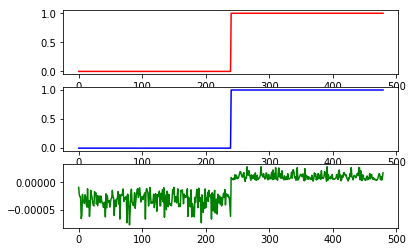

In [15]:
Y_pred = model.predict(X_test)

plt.subplot(3, 1, 1)
plt.plot(Y_test[:, 1], 'r')

plt.subplot(3, 1, 2)
plt.plot(Y_pred[:, 1], 'b')

plt.subplot(3, 1, 3)
plt.plot(Y_test[:, 1] - Y_pred[:, 1], 'g')

plt.show()

In [19]:
now = datetime.datetime.now()

# modelSaved = '{}-{}_{}_{}.h5'.format(folderNormal, folderFault, pretrainedModel, now.strftime('%m-%d-%H:%M:%S'))

modelSaved = '{}-{}_{}_{}.h5'.format(folderNormal, folderFault, pretrainedModel, now.strftime('%m-%d-%H-%M-%S'))
meanSaved = 'mean_{}.npy'.format(now.strftime('%m-%d-%H-%M-%S'))
stdSaved = 'std_{}.npy'.format(now.strftime('%m-%d-%H-%M-%S'))

inputStr = input('''Save Model as '{}'? (y/n)\n'''.format(modelSaved))

if (inputStr == 'y' or inputStr == 'Y'):  
    model.save('''D:/0_Joowhan's Paper/Real Data/Model/{}'''.format(modelSaved))
    np.save('''D:/0_Joowhan's Paper/Real Data/Model/{}'''.format(meanSaved), trainMean)
    np.save('''D:/0_Joowhan's Paper/Real Data/Model/{}'''.format(stdSaved), trainStd)

Save Model as '['1Mass']-['5Mass']_Xception_11-24-21-07-37.h5'? (y/n)
y
